In [1]:
import pandas as pd
import scienceplots
import matplotlib.pyplot as plt

In [2]:
plt.style.use(['science', 'notebook', 'grid'])

# Загрузка файлов Excel

In [3]:
vb = pd.read_excel('data.xlsx', header=3, usecols="B:O")
vb.head(7)

,Unnamed: 1,Unnamed: 2,значение показателя за год,значение показателя за год.1,значение показателя за год.2,значение показателя за год.3,значение показателя за год.4,значение показателя за год.5,значение показателя за год.6,значение показателя за год.7,значение показателя за год.8,значение показателя за год.9,значение показателя за год.10,значение показателя за год.11
0,Крымская геморрагическая лихорадка,Российская Федерация,69,99,74,80,93,139,162,79,72,134,32,49
1,Крымская геморрагическая лихорадка,Московская область,0,0,0,0,0,0,0,0,0,0,0,0
2,Крымская геморрагическая лихорадка,г. Москва,0,0,0,1,0,0,0,0,0,0,1,0
3,Крымская геморрагическая лихорадка,Ленинградская область,0,0,0,0,0,0,0,0,0,0,0,0
4,Крымская геморрагическая лихорадка,Мурманская область,0,0,0,0,2,0,0,0,0,0,0,0
5,Крымская геморрагическая лихорадка,г.Санкт-Петербург,0,0,0,0,0,0,0,0,0,0,0,0
6,Крымская геморрагическая лихорадка,Волгоградская область,3,2,0,6,6,3,14,4,9,7,0,1


In [4]:
overall = pd.read_excel('morbidity.xls', header=5, nrows=3, usecols="A,L:W")
overall

,Unnamed: 0,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Все болезни,111428.0,113922.0,113688.0,114721.0,114989.0,113927.0,115187.0,114382.0,114841.0,114512.0,111294.0,125022.0
1,из них:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,некоторые инфекционные и паразитарные болезни,4690.0,4626.0,4592.0,4434.0,4504.0,4116.0,4086.0,4012.0,3971.0,3902.0,2999.0,3115.0


# Предобработка DataFram'ов
## Предобработка vb

In [5]:
years = [i for i in range(2010, 2022)]

In [6]:
headers_vb = list(vb.columns)
vb.rename({headers_vb[0]: 'Заболевание (чел.)', headers_vb[1]: 'Территория'}, axis=1, inplace=True)
for index in range(2, 14):
    vb.rename({headers_vb[index]: years[index-2]}, axis=1, inplace=True)
vb.head()

,Заболевание (чел.),Территория,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Крымская геморрагическая лихорадка,Российская Федерация,69,99,74,80,93,139,162,79,72,134,32,49
1,Крымская геморрагическая лихорадка,Московская область,0,0,0,0,0,0,0,0,0,0,0,0
2,Крымская геморрагическая лихорадка,г. Москва,0,0,0,1,0,0,0,0,0,0,1,0
3,Крымская геморрагическая лихорадка,Ленинградская область,0,0,0,0,0,0,0,0,0,0,0,0
4,Крымская геморрагическая лихорадка,Мурманская область,0,0,0,0,2,0,0,0,0,0,0,0


## предобработка overall

In [7]:
headers_overall = list(overall.columns)
overall.rename({headers_overall[0]: 'Заболевание, диагностированные впервые (тыс. чел.)'}, axis=1, inplace=True)
for index in range(1, 13):
    overall.rename({headers_overall[index]: years[index-1]}, axis=1, inplace=True)
overall

,"Заболевание, диагностированные впервые (тыс. чел.)",2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Все болезни,111428.0,113922.0,113688.0,114721.0,114989.0,113927.0,115187.0,114382.0,114841.0,114512.0,111294.0,125022.0
1,из них:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,некоторые инфекционные и паразитарные болезни,4690.0,4626.0,4592.0,4434.0,4504.0,4116.0,4086.0,4012.0,3971.0,3902.0,2999.0,3115.0


In [8]:
overall.drop([1], axis=0, inplace=True)
overall.reset_index(drop=True, inplace=True)
overall

,"Заболевание, диагностированные впервые (тыс. чел.)",2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Все болезни,111428.0,113922.0,113688.0,114721.0,114989.0,113927.0,115187.0,114382.0,114841.0,114512.0,111294.0,125022.0
1,некоторые инфекционные и паразитарные болезни,4690.0,4626.0,4592.0,4434.0,4504.0,4116.0,4086.0,4012.0,3971.0,3902.0,2999.0,3115.0


# Вопросы:
1) Сколько всего в РФ случаев заболевания трансмиссивными болезнями за рассматриваемый период? Какова их доля среди некоторых инфекционных и паразитарных болезней? 

2) Сколько трансмиссивных заболеваний регистрируется ежегодно в РФ? Есть ли какие-то тенденции?

3) Какова доля некоторых инфекционных и паразитарных заболеваний среди впервые диагностированных?

4) Сколько случаев трансмиссивных заболеваний по каждой из группе регистируется ежегодно в РФ? Какое заболевание регистрируется чаще всего?

5) Какие 5 субъектов РФ имеют наибольшее и наименьшее количество зарегистрированных случаев КБ (суммарно)? 

### Вопросы 1-3

In [9]:
area = list(vb['Территория'].unique())
print('Рассматриваемые территории:\n')
for region in area:
    print(region)
diseases = list(vb['Заболевание (чел.)'].unique())
print('\nРассматриваемые заболевания:\n')
for disease in diseases:
    print(disease)

Рассматриваемые территории:

Российская Федерация
Московская область
г. Москва
Ленинградская область
Мурманская область
г.Санкт-Петербург
Волгоградская область
Республика Марий Эл
Пермский край
Свердловская область
Ямало-Ненецкий автономный округ
Еврейская автономная область

Рассматриваемые заболевания:

    Крымская геморрагическая лихорадка
    Лихорадка Западного Нила
Клещевой боррелиоз (болезнь Лайма)
Клещевой вирусный  энцефалит
Риккетсиозы
Туляремия


In [10]:
diseases[0] = diseases[0].replace('    ','')
diseases[1] = diseases[1].replace('    ','')

In [11]:
country = vb[vb['Территория']==area[0]]  #  трансмиссивные болезни на территории всей страны
country

,Заболевание (чел.),Территория,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Крымская геморрагическая лихорадка,Российская Федерация,69,99,74,80,93,139,162,79,72,134,32,49
12,Лихорадка Западного Нила,Российская Федерация,521,163,455,191,27,41,134,12,76,352,10,76
24,Клещевой боррелиоз (болезнь Лайма),Российская Федерация,7055,9942,8288,5712,6439,7429,6101,6712,6482,8048,4204,3875
36,Клещевой вирусный энцефалит,Российская Федерация,3094,3533,2716,2236,1978,2304,2035,1934,1727,1775,967,1010
48,Риккетсиозы,Российская Федерация,1769,1905,2261,2334,2309,2007,2062,1983,1952,2175,1183,943
60,Туляремия,Российская Федерация,115,53,127,1063,96,71,123,170,71,41,41,17


In [12]:
total = list()  # ежегодное число диагностируемых трансмиссивных инфекций
for year in years:
    total.append(country[year].sum())
sum_total = sum(total)  # сумма всех трансмиссивных инфекций за 2011-2021 гг. в РФ
sum_overall = overall.sum(axis=1)  # суммарное количество случаев заболеваний за 2011-2022 гг.
                                   # впервые диагностированных и инфекц-х и паразитарных болезней среди них
print(f'Всего за 2010-2021 гг. диагностировано {sum_total} трансмиссивных заболеваний на территории РФ.')
print(f'Доля трансмиссивных инфекций среди некоторых инфекционных и паразитарных заболеваний за весь период составляет {round(sum_total / sum_overall[1], 2)}%.')
print(f'Доля некоторых инфекционных и паразитарных заболеваний среди всех болезней, диагностированных впервые за 2010-2021 гг. составляет {round(sum_overall[1]/sum_overall[0], 2)}%.')

Всего за 2010-2021 гг. диагностировано 133607 трансмиссивных заболеваний на территории РФ.
Доля трансмиссивных инфекций среди некоторых инфекционных и паразитарных заболеваний за весь период составляет 2.72%.
Доля некоторых инфекционных и паразитарных заболеваний среди всех болезней, диагностированных впервые за 2010-2021 гг. составляет 0.04%.


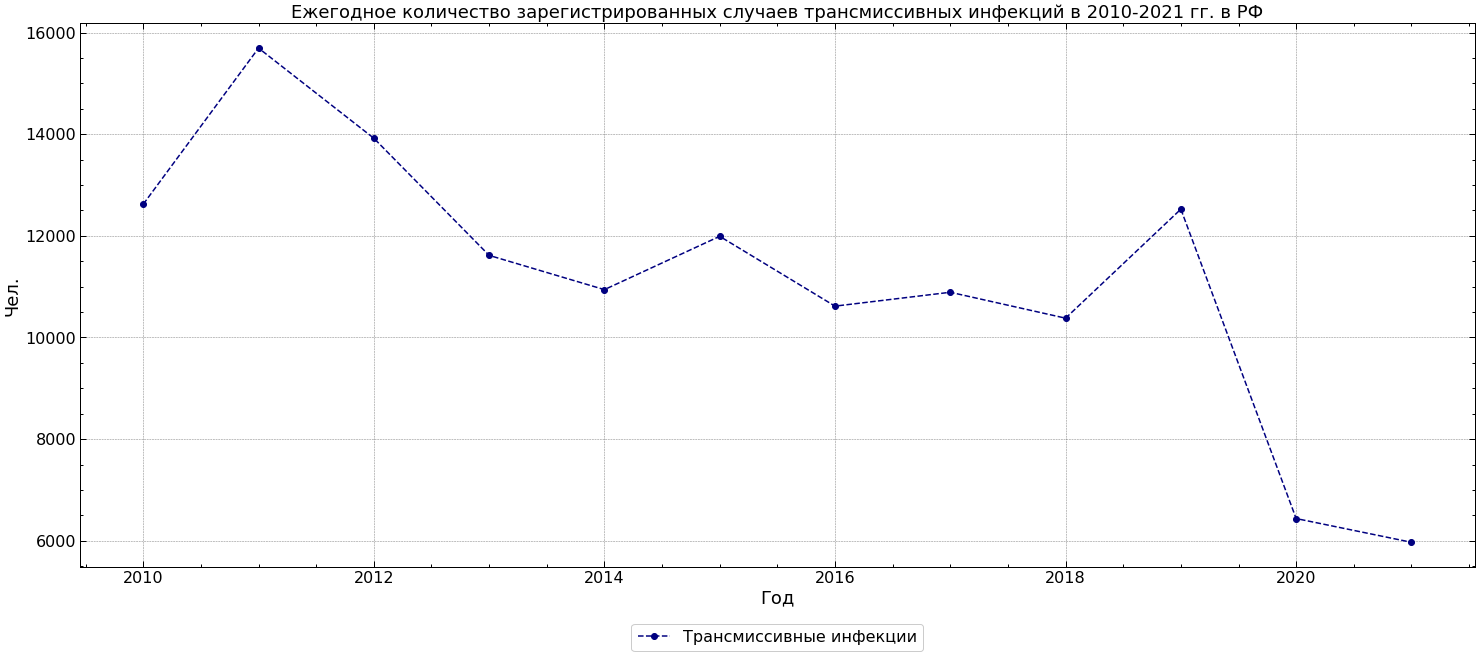

In [13]:
plt.figure(figsize=(25,10))
plt.plot(years, total, 'o--', color='navy', lw=1.5, label='Трансмиссивные инфекции')
plt.xlabel('Год', fontsize=18)
plt.ylabel('Чел.', fontsize=18)
plt.title('Ежегодное количество зарегистрированных случаев трансмиссивных инфекций в 2010-2021 гг. в РФ', size=18)
plt.legend(bbox_to_anchor=(0.5, -0.17), loc="lower center", fontsize=16)
plt.savefig('vector-borne diseases (all).png')
plt.show()

### Вопрос 4

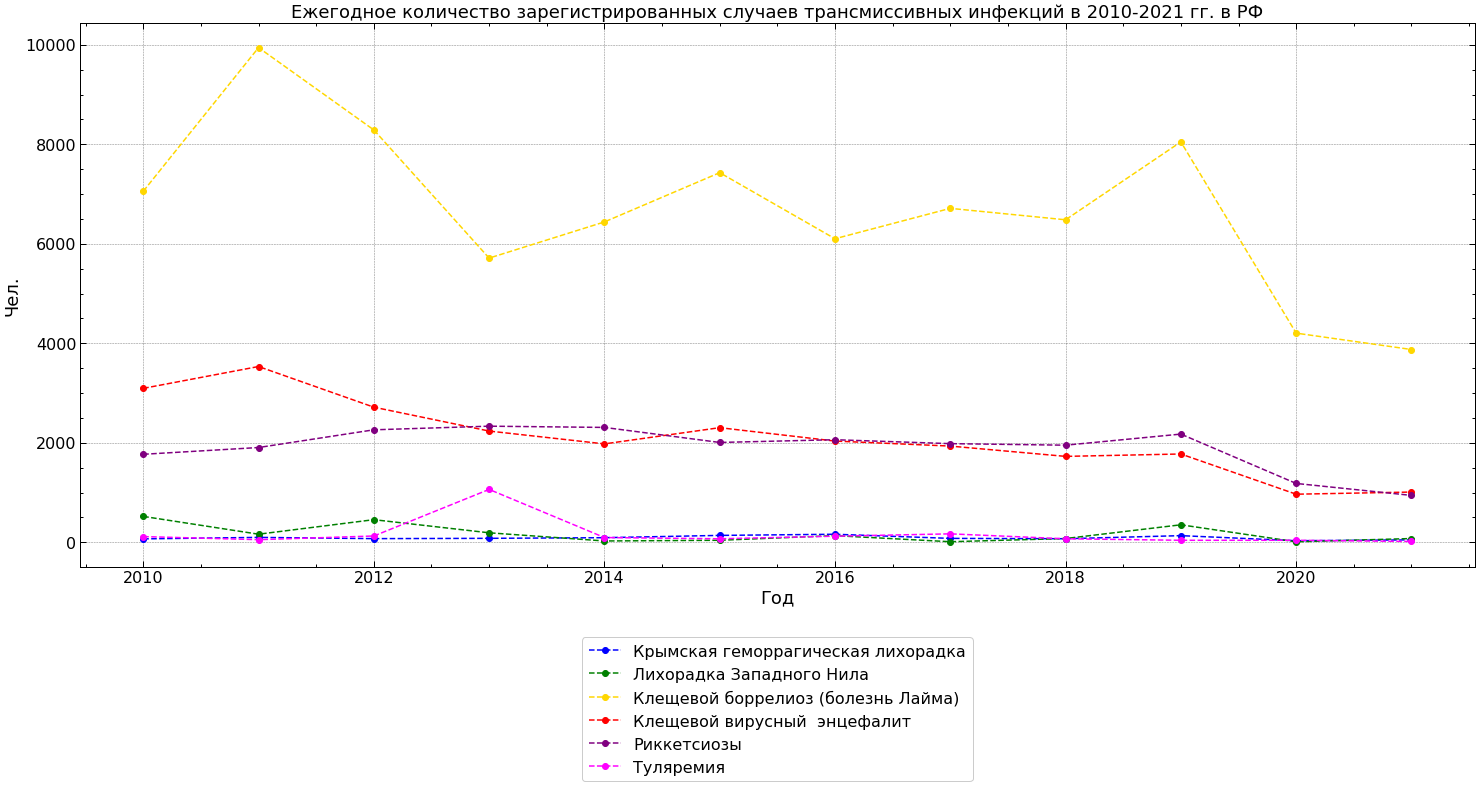

In [14]:
plt.figure(figsize=(25,10))
colors = ['blue', 'green', 'gold', 'red', 'purple', 'magenta']
indexes = list(country.index.values)
for i in range(len(indexes)):
    cases = list()
    for year in years:
        cases.append(country[year][indexes[i]])
    plt.plot(years, cases, 'o--', color=colors[i], lw=1.5, label=diseases[i])
plt.title('Ежегодное количество зарегистрированных случаев трансмиссивных инфекций в 2010-2021 гг. в РФ', size=18)
plt.xlabel('Год', fontsize=18)
plt.ylabel('Чел.', fontsize=18)
plt.legend(bbox_to_anchor=(0.5, -0.41), loc="lower center", fontsize=16)
plt.savefig('vector-borne diseases (all, yearly).png')

### Вопрос 5

In [15]:
borreliosis = vb[vb['Заболевание (чел.)']==diseases[2]]
borreliosis

,Заболевание (чел.),Территория,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
24,Клещевой боррелиоз (болезнь Лайма),Российская Федерация,7055,9942,8288,5712,6439,7429,6101,6712,6482,8048,4204,3875
25,Клещевой боррелиоз (болезнь Лайма),Московская область,268,397,443,233,280,332,314,375,401,653,283,193
26,Клещевой боррелиоз (болезнь Лайма),г. Москва,489,976,1189,638,761,1141,870,862,1071,1678,1291,1050
27,Клещевой боррелиоз (болезнь Лайма),Ленинградская область,144,144,167,76,76,73,59,37,37,43,10,7
28,Клещевой боррелиоз (болезнь Лайма),Мурманская область,4,6,7,3,6,5,1,6,5,12,1,0
29,Клещевой боррелиоз (болезнь Лайма),г.Санкт-Петербург,307,404,441,211,456,337,248,367,276,358,163,217
30,Клещевой боррелиоз (болезнь Лайма),Волгоградская область,2,0,1,2,2,2,2,4,5,7,1,2
31,Клещевой боррелиоз (болезнь Лайма),Республика Марий Эл,53,25,23,12,17,24,13,8,13,18,12,9
32,Клещевой боррелиоз (болезнь Лайма),Пермский край,429,700,339,306,562,398,283,197,213,192,53,96
33,Клещевой боррелиоз (болезнь Лайма),Свердловская область,662,1343,742,693,736,519,528,648,521,522,310,342


In [16]:
borreliosis_regions = borreliosis.drop(24, axis=0)  # исключаем из рассмотрения всю территорию РФ
cases_borr = borreliosis_regions.sum(axis=1) # количество случаев заболевания клещевым боррелиозом 
                                     # за 2011-2021 гг. в субъектах РФ
most_cases = {}
less_cases = {}
for i in range(5):
    most_cases[borreliosis['Территория'][cases_borr.idxmax()]] = cases_borr.max()
    less_cases[borreliosis['Территория'][cases_borr.idxmin()]] = cases_borr.min()
    cases_borr = cases_borr.drop(cases_borr.idxmax(), axis=0)
    cases_borr = cases_borr.drop(cases_borr.idxmin(), axis=0)
    if (less_cases.get(area[10])!=None):  # для корректного отображения ЯНАО на графике
        less_cases['ЯНАО'] = less_cases.get(area[10])
        less_cases.pop(area[10])
    if (most_cases.get(area[10])!=None):  
        most_cases['ЯНАО'] = most_cases.get(area[10])
        most_cases.pop(area[10])

In [17]:
print(most_cases, less_cases, sep='\n')

{'г. Москва': 12016, 'Свердловская область': 7566, 'Московская область': 4172, 'г.Санкт-Петербург': 3785, 'Пермский край': 3768}
{'Волгоградская область': 30, 'ЯНАО': 30, 'Еврейская автономная область': 30, 'Мурманская область': 56, 'Республика Марий Эл': 227}


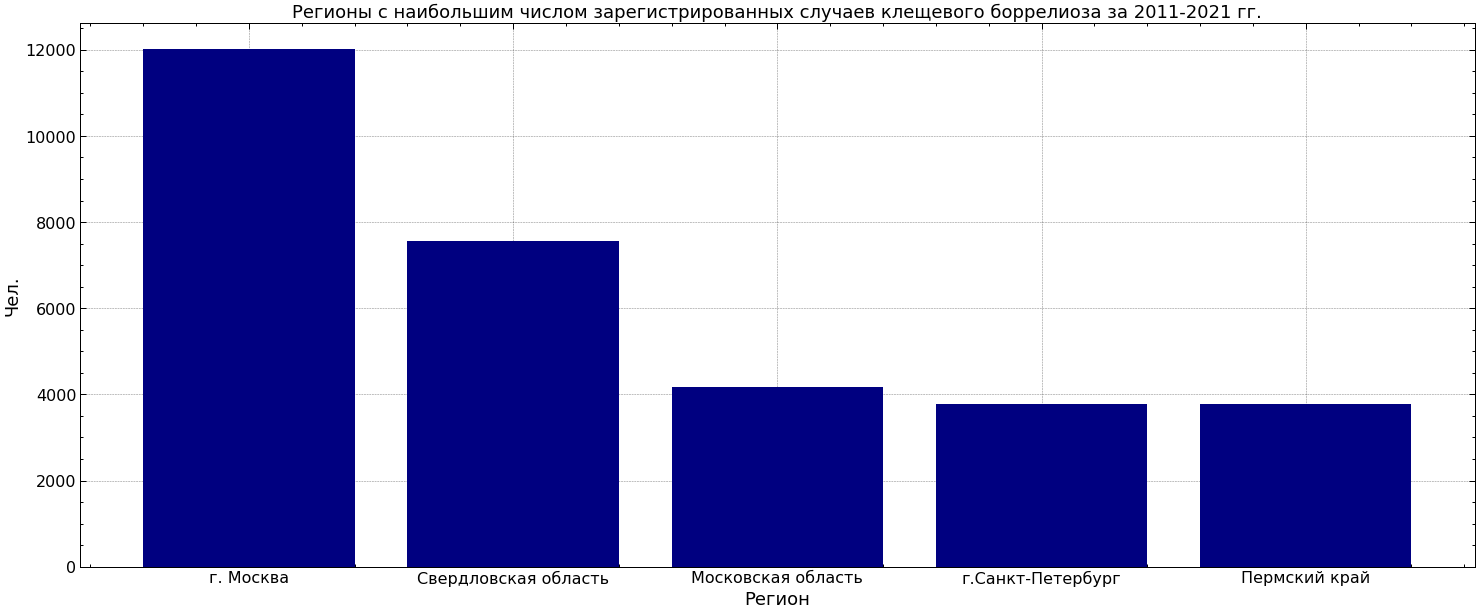

In [18]:
plt.figure(figsize=(25,10))
plt.bar(range(len(most_cases)), list(most_cases.values()), tick_label=list(most_cases.keys()), color='navy')
plt.xlabel('Регион', fontsize=18)
plt.ylabel('Чел.', fontsize=18)
plt.title('Регионы с наибольшим числом зарегистрированных случаев клещевого боррелиоза за 2011-2021 гг.', fontsize=18)
plt.savefig('lyme disease (most).png')
plt.show()

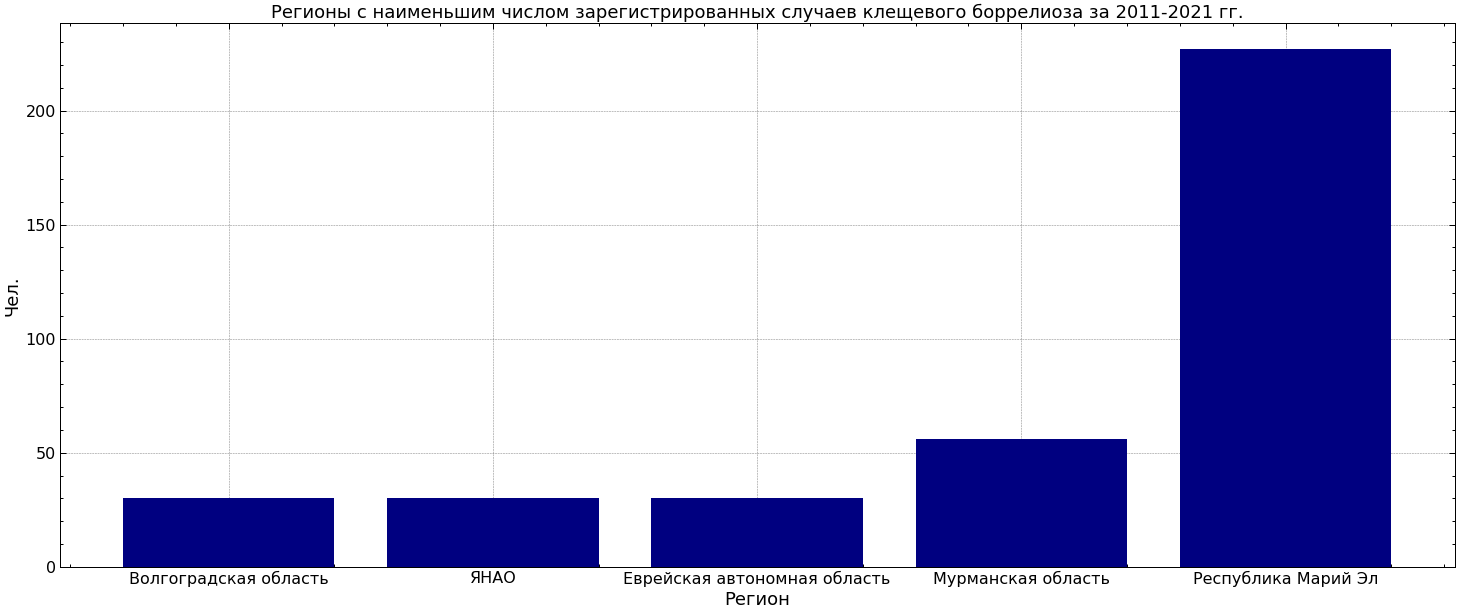

In [19]:
plt.figure(figsize=(25,10))
plt.bar(range(len(less_cases)), list(less_cases.values()), tick_label=list(less_cases.keys()), color='navy')
plt.xlabel('Регион', fontsize=18)
plt.ylabel('Чел.', fontsize=18)
plt.title('Регионы с наименьшим числом зарегистрированных случаев клещевого боррелиоза за 2011-2021 гг.', fontsize=18)
plt.savefig('lyme disease (less).png')
plt.show()